In [4]:
# Author: Deepak Pathak (c) 2016

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
# from __future__ import unicode_literals
import numpy as np
from PIL import Image

import pyflow

im1 = np.array(Image.open('examples/car1.jpg'))
im2 = np.array(Image.open('examples/car2.jpg'))
im1 = im1.astype(float) / 255.
im2 = im2.astype(float) / 255.

# Flow Options:
alpha = 0.012
ratio = 0.75
minWidth = 20
nOuterFPIterations = 7
nInnerFPIterations = 1
nSORIterations = 30
colType = 0  # 0 or default:RGB, 1:GRAY (but pass gray image with shape (h,w,1))

s = time.time()
u, v, im2W = pyflow.coarse2fine_flow(
    im1, im2, alpha, ratio, minWidth, nOuterFPIterations, nInnerFPIterations,
    nSORIterations, colType)
e = time.time()
print('Time Taken: %.2f seconds for image of size (%d, %d, %d)' % (
    e - s, im1.shape[0], im1.shape[1], im1.shape[2]))
flow = np.concatenate((u[..., None], v[..., None]), axis=2)
print(flow)
np.save('examples/outFlow.npy', flow)



Time Taken: 5.88 seconds for image of size (480, 640, 3)
[[[ 1.13564197  0.51551354]
  [ 1.13579608  0.51549872]
  [ 1.13651333  0.51561833]
  ..., 
  [ 2.89904207 -0.05516329]
  [ 2.9386018  -0.06072339]
  [ 2.91874981 -0.07951944]]

 [[ 1.13565877  0.51552505]
  [ 1.13582727  0.51543571]
  [ 1.13778822  0.51602313]
  ..., 
  [ 2.93249252 -0.06145026]
  [ 2.9277878  -0.06806644]
  [ 2.91852076 -0.07994689]]

 [[ 1.13543616  0.51557962]
  [ 1.13552316  0.51575714]
  [ 1.13649045  0.51766942]
  ..., 
  [ 2.93772129 -0.03190391]
  [ 2.91702537 -0.07580578]
  [ 2.91736735 -0.08190043]]

 ..., 
 [[-5.73028913  3.05075744]
  [-5.73037326  3.05047426]
  [-5.73076364  3.04955022]
  ..., 
  [ 1.49164982 -0.76899863]
  [ 1.49170967 -0.76898705]
  [ 1.49150608 -0.76891366]]

 [[-5.73103791  3.05062413]
  [-5.73118598  3.05051389]
  [-5.73163128  3.0502333 ]
  ..., 
  [ 1.49179715 -0.76978631]
  [ 1.49189712 -0.76943712]
  [ 1.49179224 -0.76930393]]

 [[-5.73117385  3.05052398]
  [-5.73126816  3.

(480, 640, 2)


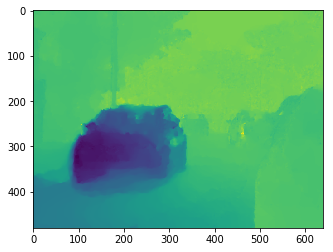

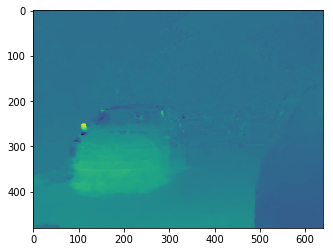

In [9]:
print(flow.shape)
import matplotlib.pyplot as plt
import matplotlib

plt.imshow(flow[:,:,0])
plt.figure()
plt.imshow(flow[:,:,1])
plt.show()